# Sentiment Analysis Trading System

In [1]:
!pip install numpy > /dev/null
!pip install pandas > /dev/null
!pip install matplotlib > /dev/null
!pip install transformers > /dev/null
!pip install torch > /dev/null
!pip install hf-xet > /dev/null
!pip install pyarrow > /dev/null
!pip install scikit-learn > /dev/null
!pip install yfinance > /dev/null
!pip install nltk > /dev/null
!pip install seaborn > /dev/null
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip insta

## Setting Up FinBERT & DistilRoBERTa & Vader


In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

finbert_pipe = pipeline("text-classification", model="ProsusAI/finbert")
distil_pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
nltk.download('vader_lexicon')

/Users/reubenbillian/data_science_project/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0
Device set to use mps:0
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/reubenbillian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Stock News Data 12/2019 - 03/2023 

In [3]:
df_stock = pd.read_csv("news_data/analyst_ratings_processed.csv").drop(columns=['Unnamed: 0'])
df_stock['date'] = pd.to_datetime(df_stock['date'], errors='coerce')
df_stock = df_stock.sort_values(by='date').reset_index().drop(columns=['index'])
df_stock = df_stock.drop_duplicates()
df_stock.head()

/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_25909/767854813.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_stock['date'] = pd.to_datetime(df_stock['date'], errors='coerce')


,title,date,stock
0,How Treasuries and ETFs Work,2009-02-14 14:02:00-05:00,NAV
1,Update on the Luxury Sector: 2nd Quarter 2009,2009-04-27 14:39:00-04:00,Y
2,Update on the Luxury Sector: 2nd Quarter 2009,2009-04-27 14:39:00-04:00,FT
3,Going Against the Herd,2009-04-29 08:48:00-04:00,A
4,Charles Sizemore Radio Interview Saturday Morning,2009-05-22 14:28:00-04:00,AM


### Using Historical S&P Sector weights

In [4]:
import yfinance as yf

In [173]:
sector_weights = pd.read_csv('other_data/S_P_500_Industry_Weights.csv')
sector_weights_long = sector_weights.melt(id_vars='Sector',
    var_name='Year',
    value_name='Weight'
)
sector_weights_long['Year'] = sector_weights_long['Year'].astype(int)
sector_weights_long

,Sector,Year,Weight
0,Communication Services,2023,9
1,Consumer Cyclical,2023,11
2,Consumer Defensive,2023,7
3,Energy,2023,4
4,Financial Services,2023,13
...,...,...,...
149,Industrials,2010,8
150,Technology,2010,12
151,Basic Materials,2010,2
152,Real Estate,2010,2


In [78]:
def get_sector(symbol):
    try:
        ticker = yf.Ticker(symbol)
        info = ticker.info
        return info.get("sector")
    except Exception as e:
        print(f"Error fetching {symbol}: {e}")
        return None

sectors = {}
tickers = df_stock['stock'].unique()
for sym in tickers:
    if sym not in sectors:
        sectors[sym] = get_sector(sym)
sectors

Error fetching TPX: HTTP Error 404: 
Error fetching HCP: HTTP Error 404: 
Error fetching INFN: HTTP Error 404: 
Error fetching BRXX: HTTP Error 404: 
Error fetching CJJD: HTTP Error 404: 
Error fetching ROIC: HTTP Error 404: 
Error fetching AND: HTTP Error 404: 
Error fetching PFK: HTTP Error 404: 
Error fetching CTV: HTTP Error 404: 
Error fetching NKY: HTTP Error 404: 
Error fetching TBAR: HTTP Error 404: 
Error fetching CVOL: HTTP Error 404: 
Error fetching WDTI: HTTP Error 404: 
Error fetching MLPL: HTTP Error 404: 
Error fetching CRBQ: HTTP Error 404: 
Error fetching JPP: HTTP Error 404: 
Error fetching TNDQ: HTTP Error 404: 
Error fetching FCHI: HTTP Error 404: 
Error fetching QEH: HTTP Error 404: 
Error fetching EWHS: HTTP Error 404: 
Error fetching SGYPU: HTTP Error 404: 
Error fetching HOTRW: HTTP Error 404: 
Error fetching GALTU: HTTP Error 404: 
Error fetching IDHB: HTTP Error 404: 
Error fetching CELGZ: HTTP Error 404: 
Error fetching HYB: HTTP Error 404: 
Error fetching MO

{'NAV': None,
 'Y': None,
 'FT': 'Financial Services',
 'A': 'Healthcare',
 'AM': 'Energy',
 'EPS': None,
 'GMCR': None,
 'JVA': 'Consumer Defensive',
 'RF': 'Financial Services',
 'Q': None,
 'DIT': 'Consumer Defensive',
 'OCLS': None,
 'DD': 'Basic Materials',
 'EVK': None,
 'TZOO': 'Communication Services',
 'EFUT': None,
 'SKBI': None,
 'PDT': 'Financial Services',
 'OB': 'Communication Services',
 'B': None,
 'M': 'Consumer Cyclical',
 'R': 'Industrials',
 'ADS': None,
 'CLWT': 'Industrials',
 'KO': 'Consumer Defensive',
 'CP': 'Industrials',
 'GAIN': 'Financial Services',
 'STC': 'Financial Services',
 'SUN': 'Energy',
 'K': 'Consumer Defensive',
 'WNR': None,
 'CSX': 'Industrials',
 'QID': None,
 'PRGS': 'Technology',
 'CALD': None,
 'HNSN': None,
 'WPC': 'Real Estate',
 'IAG': 'Basic Materials',
 'OXY': 'Energy',
 'SATS': 'Technology',
 'SFL': 'Industrials',
 'DCOM': 'Financial Services',
 'NTAP': 'Technology',
 'SHOR': None,
 'CDNS': 'Technology',
 'VRSN': 'Technology',
 'KYO'

In [95]:
df_stock['sector'] = df_stock['stock'].map(sectors)
df_stock = df_stock.dropna().reset_index(drop=True)
df_stock

,title,date,stock,sector
0,Update on the Luxury Sector: 2nd Quarter 2009,2009-04-27 14:39:00-04:00,FT,Financial Services
1,Going Against the Herd,2009-04-29 08:48:00-04:00,A,Healthcare
2,Charles Sizemore Radio Interview Saturday Morning,2009-05-22 14:28:00-04:00,AM,Energy
3,"JVA perks to 39% gain, SMCG ready, MRM to cont...",2009-05-27 03:32:00-04:00,JVA,Consumer Defensive
4,MRM a $15-$20+ stock - FIT new information - J...,2009-05-27 21:35:00-04:00,JVA,Consumer Defensive
...,...,...,...,...
836604,W. P. Carey Inc. Increases Quarterly Dividend ...,2020-06-11 16:30:00-04:00,WPC,Real Estate
836605,7 Stocks Moving In Thursday's After-Hours Session,2020-06-11 16:49:00-04:00,PVH,Consumer Cyclical
836606,"Financials, Energy Among Worst-Hit Sectors In ...",2020-06-11 16:51:00-04:00,WMT,Consumer Defensive
836607,PG&E Corp Reports CPUC Approved Co.'s Microgri...,2020-06-11 17:11:00-04:00,PCG,Utilities


In [ ]:
df_stock = df_stock.dropna().reset_index(drop=True)
df_stock.rename(columns={'sector': 'Sector'}, inplace=True)
df_stock['Year'] = df_stock['date'].dt.year
df_stock['Sector'] = df_stock['Sector'].fillna('').str.strip()
df_stock = df_stock[df_stock['Sector'] != '']
df_stock['Year'].dtypes

dtype('int32')

In [180]:
df_stock.head()

,title,date,stock,Sector,Year
0,Update on the Luxury Sector: 2nd Quarter 2009,2009-04-27 13:39:00-05:00,FT,Financial Services,2009
1,Going Against the Herd,2009-04-29 07:48:00-05:00,A,Healthcare,2009
2,Charles Sizemore Radio Interview Saturday Morning,2009-05-22 13:28:00-05:00,AM,Energy,2009
3,"JVA perks to 39% gain, SMCG ready, MRM to cont...",2009-05-27 02:32:00-05:00,JVA,Consumer Defensive,2009
4,MRM a $15-$20+ stock - FIT new information - J...,2009-05-27 20:35:00-05:00,JVA,Consumer Defensive,2009


In [195]:
df_stock = df_stock.merge(
    sector_weights_long,
    how='left',
    left_on=['Sector', 'Year'],
    right_on=['Sector', 'Year']
)

df_stock.drop(columns=['Sector','Year', "stock"], inplace=True)
df_stock.rename(columns={'Weight': 'Sector Weighting'}, inplace=True)
df_stock['Sector Weighting'] = df_stock['Sector Weighting'] / 100
df_stock.dropna(inplace=True)
df_stock.reset_index(drop=True, inplace=True)
df_stock

,title,date,Sector Weighting
0,"Cramer's 2010 Tech Picks (CSCO, VMW, ACN)",2010-01-03 12:40:00-05:00,0.12
1,Barron's Bullish Positions On January 2nd (CVX...,2010-01-03 13:19:00-05:00,0.08
2,"Jack & Jill: Wal-Mart and eBay, Part 1.",2010-01-03 19:23:00-05:00,0.06
3,"Jack & Jill: Wal-Mart and eBay, Part 1.",2010-01-03 19:23:00-05:00,0.06
4,Is the January Effect Still Relevant?,2010-01-03 20:39:00-05:00,0.08
...,...,...,...
827804,W. P. Carey Inc. Increases Quarterly Dividend ...,2020-06-11 15:30:00-05:00,0.02
827805,7 Stocks Moving In Thursday's After-Hours Session,2020-06-11 15:49:00-05:00,0.13
827806,"Financials, Energy Among Worst-Hit Sectors In ...",2020-06-11 15:51:00-05:00,0.07
827807,PG&E Corp Reports CPUC Approved Co.'s Microgri...,2020-06-11 16:11:00-05:00,0.02


## Sentiment Analysis

#### Setting Up FinBERT & DistilRoBERTa & VADER

In [196]:
distil = distil_pipe(df_stock['title'].to_list(), batch_size=32)
df_stock['DistilRoBERTa Scores Headline'] = [r['score'] for r in distil]

In [197]:
finBERT = finbert_pipe(df_stock['title'].to_list(), batch_size=32)
df_stock['FinBERT Scores Headline'] = [r['score'] for r in finBERT]

In [198]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

df_stock[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = df_stock['title'].apply(
    lambda x: pd.Series(vader.polarity_scores(str(x)))
)

In [199]:
df_stock.drop(columns=['title'], inplace=True)
df_stock

,date,Sector Weighting,DistilRoBERTa Scores Headline,FinBERT Scores Headline,vader_neg,vader_neu,vader_pos,vader_compound
0,2010-01-03 12:40:00-05:00,0.12,0.999869,0.923206,0.0,1.000,0.000,0.0000
1,2010-01-03 13:19:00-05:00,0.08,0.999857,0.833681,0.0,1.000,0.000,0.0000
2,2010-01-03 19:23:00-05:00,0.06,0.999879,0.944307,0.0,1.000,0.000,0.0000
3,2010-01-03 19:23:00-05:00,0.06,0.999879,0.944307,0.0,1.000,0.000,0.0000
4,2010-01-03 20:39:00-05:00,0.08,0.998957,0.827282,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
827804,2020-06-11 15:30:00-05:00,0.02,0.998135,0.874706,0.0,1.000,0.000,0.0000
827805,2020-06-11 15:49:00-05:00,0.13,0.999832,0.750194,0.0,1.000,0.000,0.0000
827806,2020-06-11 15:51:00-05:00,0.07,0.998261,0.959410,0.0,0.826,0.174,0.2732
827807,2020-06-11 16:11:00-05:00,0.02,0.999213,0.931756,0.0,0.714,0.286,0.4215


#### Saving Dataset as paraquet

In [208]:
df_stock.to_parquet("datasets/stock_dataset.parquet", index=False)

## Historical Price Data

In [468]:
df_stock = pd.read_parquet("datasets/stock_dataset.parquet").set_index('date')
df_stock.drop_duplicates(inplace=True)
df_stock.index = df_stock.index.date
grouped = df_stock.groupby(df_stock.index)
result = grouped.agg(['mean', 'std', 'count'])
result.columns = ['_'.join(col) for col in result.columns]
df_stock = result.copy()
df_stock

,Sector Weighting_mean,Sector Weighting_std,Sector Weighting_count,DistilRoBERTa Scores Headline_mean,DistilRoBERTa Scores Headline_std,DistilRoBERTa Scores Headline_count,FinBERT Scores Headline_mean,FinBERT Scores Headline_std,FinBERT Scores Headline_count,vader_neg_mean,...,vader_neg_count,vader_neu_mean,vader_neu_std,vader_neu_count,vader_pos_mean,vader_pos_std,vader_pos_count,vader_compound_mean,vader_compound_std,vader_compound_count
2010-01-03,0.085000,0.025166,4,0.999640,0.000456,4,0.882119,0.060302,4,0.000000,...,4,1.000000,0.000000,4,0.000000,0.000000,4,0.000000,0.000000,4
2010-01-04,0.101304,0.076905,69,0.974553,0.071931,69,0.808869,0.148466,69,0.030174,...,69,0.888870,0.158277,69,0.080957,0.131791,69,0.080677,0.249509,69
2010-01-05,0.079070,0.034966,86,0.981533,0.068129,86,0.841588,0.123687,86,0.029326,...,86,0.858756,0.156317,86,0.111919,0.140273,86,0.131840,0.280285,86
2010-01-06,0.086889,0.048079,90,0.984411,0.059743,90,0.843334,0.126978,90,0.024111,...,90,0.869633,0.148215,90,0.106256,0.131363,90,0.095947,0.222785,90
2010-01-07,0.084857,0.061066,105,0.982598,0.063515,105,0.829687,0.134266,105,0.037676,...,105,0.857095,0.166890,105,0.105229,0.152537,105,0.099840,0.268141,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-07,0.140769,0.055597,13,0.968722,0.106212,13,0.869551,0.111537,13,0.000000,...,13,0.928769,0.112130,13,0.071231,0.112130,13,0.097800,0.153462,13
2020-06-08,0.108279,0.064023,308,0.985784,0.054528,308,0.820445,0.147825,308,0.027399,...,308,0.891195,0.123806,308,0.081412,0.109634,308,0.134490,0.296864,308
2020-06-09,0.118867,0.060770,300,0.986487,0.055257,300,0.824475,0.155418,300,0.051393,...,300,0.861787,0.128294,300,0.086810,0.103937,300,0.122055,0.347083,300
2020-06-10,0.124751,0.064408,301,0.985349,0.060077,301,0.827041,0.142290,301,0.039405,...,301,0.868678,0.132383,301,0.091924,0.112297,301,0.105436,0.299199,301


In [469]:
df_prices = pd.read_csv('price_data/spy_prices.csv')
df_prices = df_prices[::-1]
lower_cutoff_date = pd.to_datetime("01/03/2010", format="%m/%d/%Y")
higher_cutoff_date = pd.to_datetime("06/20/2020", format="%m/%d/%Y")
df_prices.rename(columns={'Date':'date'}, inplace=True)
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices = df_prices[(df_prices['date'] > lower_cutoff_date) & (df_prices['date'] < higher_cutoff_date)].reset_index(drop=True)
df_prices

,date,Price,Open,High,Low,Vol.,Change %
0,2010-01-04,113.33,112.37,113.39,111.51,118.94M,1.70%
1,2010-01-05,113.63,113.26,113.68,112.85,111.58M,0.26%
2,2010-01-06,113.71,113.52,113.99,113.43,116.07M,0.07%
3,2010-01-07,114.19,113.50,114.33,113.18,131.09M,0.42%
4,2010-01-08,114.57,113.89,114.62,113.66,126.40M,0.33%
...,...,...,...,...,...,...,...
2629,2020-06-15,307.05,298.02,308.28,296.74,135.78M,0.93%
2630,2020-06-16,312.96,315.48,315.64,307.67,137.63M,1.92%
2631,2020-06-17,311.66,314.07,314.39,310.86,83.40M,-0.42%
2632,2020-06-18,311.78,310.00,312.30,309.51,80.83M,0.04%


In [470]:
def parse_dollar_amount(val):
    if isinstance(val, str):
        val = val.strip().upper().replace(',', '')
        if val.endswith('K'):
            return float(val[:-1]) * 1e3
        elif val.endswith('M'):
            return float(val[:-1]) * 1e6
        elif val.endswith('B'):
            return float(val[:-1]) * 1e9
        else:
            return float(val)
    return val
df_prices['Vol.'] = df_prices['Vol.'].apply(parse_dollar_amount)
df_prices.drop(columns=['Change %', 'High', 'Low'], inplace=True)
print(df_prices.dtypes)
df_prices

date     datetime64[ns]
Price           float64
Open            float64
Vol.            float64
dtype: object


,date,Price,Open,Vol.
0,2010-01-04,113.33,112.37,118940000.0
1,2010-01-05,113.63,113.26,111580000.0
2,2010-01-06,113.71,113.52,116070000.0
3,2010-01-07,114.19,113.50,131090000.0
4,2010-01-08,114.57,113.89,126400000.0
...,...,...,...,...
2629,2020-06-15,307.05,298.02,135780000.0
2630,2020-06-16,312.96,315.48,137630000.0
2631,2020-06-17,311.66,314.07,83400000.0
2632,2020-06-18,311.78,310.00,80830000.0


In [471]:
df_stock['date'] = pd.to_datetime(df_stock.index)
df_stock.reset_index(drop=True)

,Sector Weighting_mean,Sector Weighting_std,Sector Weighting_count,DistilRoBERTa Scores Headline_mean,DistilRoBERTa Scores Headline_std,DistilRoBERTa Scores Headline_count,FinBERT Scores Headline_mean,FinBERT Scores Headline_std,FinBERT Scores Headline_count,vader_neg_mean,...,vader_neu_mean,vader_neu_std,vader_neu_count,vader_pos_mean,vader_pos_std,vader_pos_count,vader_compound_mean,vader_compound_std,vader_compound_count,date
0,0.085000,0.025166,4,0.999640,0.000456,4,0.882119,0.060302,4,0.000000,...,1.000000,0.000000,4,0.000000,0.000000,4,0.000000,0.000000,4,2010-01-03
1,0.101304,0.076905,69,0.974553,0.071931,69,0.808869,0.148466,69,0.030174,...,0.888870,0.158277,69,0.080957,0.131791,69,0.080677,0.249509,69,2010-01-04
2,0.079070,0.034966,86,0.981533,0.068129,86,0.841588,0.123687,86,0.029326,...,0.858756,0.156317,86,0.111919,0.140273,86,0.131840,0.280285,86,2010-01-05
3,0.086889,0.048079,90,0.984411,0.059743,90,0.843334,0.126978,90,0.024111,...,0.869633,0.148215,90,0.106256,0.131363,90,0.095947,0.222785,90,2010-01-06
4,0.084857,0.061066,105,0.982598,0.063515,105,0.829687,0.134266,105,0.037676,...,0.857095,0.166890,105,0.105229,0.152537,105,0.099840,0.268141,105,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,0.140769,0.055597,13,0.968722,0.106212,13,0.869551,0.111537,13,0.000000,...,0.928769,0.112130,13,0.071231,0.112130,13,0.097800,0.153462,13,2020-06-07
3739,0.108279,0.064023,308,0.985784,0.054528,308,0.820445,0.147825,308,0.027399,...,0.891195,0.123806,308,0.081412,0.109634,308,0.134490,0.296864,308,2020-06-08
3740,0.118867,0.060770,300,0.986487,0.055257,300,0.824475,0.155418,300,0.051393,...,0.861787,0.128294,300,0.086810,0.103937,300,0.122055,0.347083,300,2020-06-09
3741,0.124751,0.064408,301,0.985349,0.060077,301,0.827041,0.142290,301,0.039405,...,0.868678,0.132383,301,0.091924,0.112297,301,0.105436,0.299199,301,2020-06-10


#### Merging SPY prices

In [472]:
df_merged = pd.merge(df_stock, df_prices, on='date', how='right')
df_merged.interpolate(method='linear', inplace=True)
df_merged.dropna(inplace=True)
df_merged

,Sector Weighting_mean,Sector Weighting_std,Sector Weighting_count,DistilRoBERTa Scores Headline_mean,DistilRoBERTa Scores Headline_std,DistilRoBERTa Scores Headline_count,FinBERT Scores Headline_mean,FinBERT Scores Headline_std,FinBERT Scores Headline_count,vader_neg_mean,...,vader_pos_mean,vader_pos_std,vader_pos_count,vader_compound_mean,vader_compound_std,vader_compound_count,date,Price,Open,Vol.
0,0.101304,0.076905,69.0,0.974553,0.071931,69.0,0.808869,0.148466,69.0,0.030174,...,0.080957,0.131791,69.0,0.080677,0.249509,69.0,2010-01-04,113.33,112.37,118940000.0
1,0.079070,0.034966,86.0,0.981533,0.068129,86.0,0.841588,0.123687,86.0,0.029326,...,0.111919,0.140273,86.0,0.131840,0.280285,86.0,2010-01-05,113.63,113.26,111580000.0
2,0.086889,0.048079,90.0,0.984411,0.059743,90.0,0.843334,0.126978,90.0,0.024111,...,0.106256,0.131363,90.0,0.095947,0.222785,90.0,2010-01-06,113.71,113.52,116070000.0
3,0.084857,0.061066,105.0,0.982598,0.063515,105.0,0.829687,0.134266,105.0,0.037676,...,0.105229,0.152537,105.0,0.099840,0.268141,105.0,2010-01-07,114.19,113.50,131090000.0
4,0.081887,0.034174,106.0,0.965711,0.102060,106.0,0.852040,0.124194,106.0,0.038377,...,0.115434,0.157667,106.0,0.097281,0.252514,106.0,2010-01-08,114.57,113.89,126400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,0.104465,0.098232,144.0,0.108329,0.281982,144.0,2020-06-15,307.05,298.02,135780000.0
2630,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,0.104465,0.098232,144.0,0.108329,0.281982,144.0,2020-06-16,312.96,315.48,137630000.0
2631,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,0.104465,0.098232,144.0,0.108329,0.281982,144.0,2020-06-17,311.66,314.07,83400000.0
2632,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,0.104465,0.098232,144.0,0.108329,0.281982,144.0,2020-06-18,311.78,310.00,80830000.0


In [473]:
def remove_percent(val):
    if isinstance(val, str):
        return val.split('%')[0]
    else:
        return None

### Merging Other Stock info

In [474]:
df_apple = pd.read_csv('price_data/apple_prices.csv')
df_apple.columns = ['date', 'Price', 'Open', 'High', 'Low', 'Apple Vol', 'Change Apple %']
df_apple['date'] = pd.to_datetime(df_apple['date'])
df_apple['Change Apple %'] = df_apple['Change Apple %'].apply(remove_percent)
df_apple['Apple Vol'] = df_apple['Apple Vol'].apply(parse_dollar_amount) # defined earlier
df_apple.drop(columns=['Price', 'Open', 'Low', 'Price', 'High'], inplace=True)
df_apple

,date,Apple Vol,Change Apple %
0,2025-05-08,30950000.0,1.19
1,2025-05-07,68620000.0,-1.14
2,2025-05-06,51220000.0,-0.19
3,2025-05-05,69020000.0,-3.15
4,2025-05-02,101010000.0,-3.74
...,...,...,...
3857,2010-01-08,447880000.0,0.66
3858,2010-01-07,477130000.0,-0.13
3859,2010-01-06,552160000.0,-1.70
3860,2010-01-05,601900000.0,0.26


In [475]:
df_alphabet = pd.read_csv('price_data/alphabet_prices.csv')
df_alphabet.columns = ['date', 'Price', 'Open', 'High', 'Low', 'Alphabet Vol', 'Change Alphabet %']
df_alphabet['date'] = pd.to_datetime(df_alphabet['date'])
df_alphabet['Change Alphabet %'] = df_alphabet['Change Alphabet %'].apply(remove_percent)
df_alphabet['Alphabet Vol'] = df_alphabet['Alphabet Vol'].apply(parse_dollar_amount) # defined earlier
df_alphabet.drop(columns=['Price', 'Open', 'Low', 'Price', 'High'], inplace=True)
df_alphabet

,date,Alphabet Vol,Change Alphabet %
0,2025-05-08,42380000.0,2.73
1,2025-05-07,127750000.0,-7.26
2,2025-05-06,21280000.0,-0.60
3,2025-05-05,21340000.0,0.11
4,2025-05-02,25720000.0,1.69
...,...,...,...
3857,2010-01-08,94490000.0,1.34
3858,2010-01-07,128360000.0,-2.30
3859,2010-01-06,79610000.0,-2.50
3860,2010-01-05,60160000.0,-0.45


In [476]:
df_exxon = pd.read_csv('price_data/exxon_prices.csv')
df_exxon.columns = ['date', 'Price', 'Open', 'High', 'Low', 'Exxon Vol', 'Change Exxon %']
df_exxon['date'] = pd.to_datetime(df_exxon['date'])
df_exxon['Change Exxon %'] = df_exxon['Change Exxon %'].apply(remove_percent)
df_exxon['Exxon Vol'] = df_exxon['Exxon Vol'].apply(parse_dollar_amount) # defined earlier
df_exxon.drop(columns=['Price', 'Open', 'Low', 'Price', 'High'], inplace=True)
df_exxon

,date,Exxon Vol,Change Exxon %
0,2025-05-08,9340000.0,1.73
1,2025-05-07,12340000.0,-0.10
2,2025-05-06,16300000.0,1.39
3,2025-05-05,19620000.0,-2.77
4,2025-05-02,16580000.0,0.41
...,...,...,...
3856,2010-01-08,24900000.0,-0.40
3857,2010-01-07,27190000.0,-0.31
3858,2010-01-06,35050000.0,0.86
3859,2010-01-05,30180000.0,0.39


In [477]:
df_microsoft = pd.read_csv('price_data/microsoft_prices.csv')
df_microsoft.columns = ['date', 'Price', 'Open', 'High', 'Low', 'Microsoft Vol', 'Change Microsoft %']
df_microsoft['date'] = pd.to_datetime(df_microsoft['date'])
df_microsoft['Change Microsoft %'] = df_microsoft['Change Microsoft %'].apply(remove_percent)
df_microsoft['Microsoft Vol'] = df_microsoft['Microsoft Vol'].apply(parse_dollar_amount) # defined earlier
df_microsoft.drop(columns=['Price', 'Open', 'Low', 'Price', 'High'], inplace=True)
df_microsoft

,date,Microsoft Vol,Change Microsoft %
0,2025-05-08,14830000.0,1.98
1,2025-05-07,23310000.0,0.01
2,2025-05-06,15100000.0,-0.66
3,2025-05-05,20140000.0,0.20
4,2025-05-02,30760000.0,2.32
...,...,...,...
3857,2010-01-08,51200000.0,0.69
3858,2010-01-07,50560000.0,-1.04
3859,2010-01-06,58180000.0,-0.61
3860,2010-01-05,49760000.0,0.03


In [478]:
df_apple_merged = pd.merge(df_merged, df_apple, on='date', how='left')
df_merged.interpolate(method='linear', inplace=True)
df_merged.dropna(inplace=True)
df_apple_merged

df_alphabet_merged = pd.merge(df_apple_merged, df_alphabet, on='date', how='left')
df_alphabet_merged.interpolate(method='linear', inplace=True)
df_alphabet_merged.dropna(inplace=True)
df_alphabet_merged

df_exxon_merged = pd.merge(df_alphabet_merged, df_exxon, on='date', how='left')
df_exxon_merged.interpolate(method='linear', inplace=True)
df_exxon_merged.dropna(inplace=True)
df_exxon_merged

df_final_merged = pd.merge(df_exxon_merged, df_microsoft, on='date', how='left')
df_final_merged.interpolate(method='linear', inplace=True)
df_final_merged.dropna(inplace=True)
df_final_merged


/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_6474/3136851143.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_alphabet_merged.interpolate(method='linear', inplace=True)
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_6474/3136851143.py:12: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_exxon_merged.interpolate(method='linear', inplace=True)
/var/folders/1z/4vj5dxp168x5vkfsqnt9vfp40000gn/T/ipykernel_6474/3136851143.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_final_merged.interpolate(method='linear', inplace=True)


,Sector Weighting_mean,Sector Weighting_std,Sector Weighting_count,DistilRoBERTa Scores Headline_mean,DistilRoBERTa Scores Headline_std,DistilRoBERTa Scores Headline_count,FinBERT Scores Headline_mean,FinBERT Scores Headline_std,FinBERT Scores Headline_count,vader_neg_mean,...,Open,Vol.,Apple Vol,Change Apple %,Alphabet Vol,Change Alphabet %,Exxon Vol,Change Exxon %,Microsoft Vol,Change Microsoft %
0,0.101304,0.076905,69.0,0.974553,0.071931,69.0,0.808869,0.148466,69.0,0.030174,...,112.37,118940000.0,493730000.0,1.46,39160000.0,1.10,27810000.0,1.41,38410000.0,1.54
1,0.079070,0.034966,86.0,0.981533,0.068129,86.0,0.841588,0.123687,86.0,0.029326,...,113.26,111580000.0,601900000.0,0.26,60160000.0,-0.45,30180000.0,0.39,49760000.0,0.03
2,0.086889,0.048079,90.0,0.984411,0.059743,90.0,0.843334,0.126978,90.0,0.024111,...,113.52,116070000.0,552160000.0,-1.70,79610000.0,-2.50,35050000.0,0.86,58180000.0,-0.61
3,0.084857,0.061066,105.0,0.982598,0.063515,105.0,0.829687,0.134266,105.0,0.037676,...,113.50,131090000.0,477130000.0,-0.13,128360000.0,-2.30,27190000.0,-0.31,50560000.0,-1.04
4,0.081887,0.034174,106.0,0.965711,0.102060,106.0,0.852040,0.124194,106.0,0.038377,...,113.89,126400000.0,447880000.0,0.66,94490000.0,1.34,24900000.0,-0.40,51200000.0,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,298.02,135780000.0,138810000.0,1.24,30550000.0,0.55,27930000.0,-0.06,32770000.0,0.64
2630,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,315.48,137630000.0,165430000.0,2.65,30700000.0,1.80,26200000.0,2.25,42560000.0,2.45
2631,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,314.07,83400000.0,114410000.0,-0.14,30610000.0,0.43,19280000.0,-3.26,25690000.0,0.35
2632,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,310.00,80830000.0,96820000.0,0.03,34860000.0,-1.27,21480000.0,0.62,23060000.0,1.07


In [479]:
df_final_merged.to_parquet("datasets/model_dataset.parquet", index=False)

In [494]:
from sklearn.preprocessing import StandardScaler
df_final_merged = pd.read_parquet('datasets/model_dataset.parquet').set_index('date')
df_final_merged[['Change Exxon %', 'Change Microsoft %']] = df_final_merged[['Change Exxon %', 'Change Microsoft %']].astype(float)
df_final_merged['Momentum'] = df_final_merged['Price'].astype(float) - df_final_merged['Price'].shift(1).astype(float)
df_final_merged['label'] = ((-df_final_merged['Price'].astype(float) + df_final_merged['Price'].shift(-3).astype(float)) > 0).astype(int)
df_final_merged = df_final_merged.dropna()
df_final_merged
scalar = StandardScaler()
df_final_merged[['Vol.', 'Apple Vol', 'Alphabet Vol', 'Exxon Vol', 'Microsoft Vol']] = scalar.fit_transform(df_final_merged[['Vol.', 'Apple Vol', 'Alphabet Vol', 'Exxon Vol', 'Microsoft Vol']])
df_final_merged

,Sector Weighting_mean,Sector Weighting_std,Sector Weighting_count,DistilRoBERTa Scores Headline_mean,DistilRoBERTa Scores Headline_std,DistilRoBERTa Scores Headline_count,FinBERT Scores Headline_mean,FinBERT Scores Headline_std,FinBERT Scores Headline_count,vader_neg_mean,...,Apple Vol,Change Apple %,Alphabet Vol,Change Alphabet %,Exxon Vol,Change Exxon %,Microsoft Vol,Change Microsoft %,Momentum,label
date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.079070,0.034966,86.0,0.981533,0.068129,86.0,0.841588,0.123687,86.0,0.029326,...,1.327344,0.26,0.614021,-0.45,1.631450,0.39,0.420119,0.03,0.30,1
2010-01-06,0.086889,0.048079,90.0,0.984411,0.059743,90.0,0.843334,0.126978,90.0,0.024111,...,1.112950,-1.70,1.392557,-2.50,2.183297,0.86,0.788291,-0.61,0.08,1
2010-01-07,0.084857,0.061066,105.0,0.982598,0.063515,105.0,0.829687,0.134266,105.0,0.037676,...,0.789549,-0.13,3.343901,-2.30,1.292636,-0.31,0.455100,-1.04,0.48,0
2010-01-08,0.081887,0.034174,106.0,0.965711,0.102060,106.0,0.852040,0.124194,106.0,0.038377,...,0.663473,0.66,1.988167,1.34,1.033144,-0.40,0.483084,0.69,0.38,1
2010-01-11,0.093085,0.064642,94.0,0.985509,0.058582,94.0,0.847627,0.109314,94.0,0.034362,...,0.725325,-0.92,3.983541,-0.20,1.688108,1.12,1.250473,-1.27,0.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-15,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,-0.668709,1.24,-0.571195,0.55,1.376490,-0.06,-0.322782,0.64,2.84,1
2020-06-16,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,-0.553969,2.65,-0.565190,1.80,1.180454,2.25,0.105293,2.45,5.91,0
2020-06-17,0.096875,0.052855,144.0,0.978591,0.074272,144.0,0.839415,0.162661,144.0,0.065062,...,-0.773880,-0.14,-0.568793,0.43,0.396310,-3.26,-0.632361,0.35,-1.30,0


In [545]:
df_final_merged.columns

Index(['Sector Weighting_mean', 'Sector Weighting_std',
       'Sector Weighting_count', 'DistilRoBERTa Scores Headline_mean',
       'DistilRoBERTa Scores Headline_std',
       'DistilRoBERTa Scores Headline_count', 'FinBERT Scores Headline_mean',
       'FinBERT Scores Headline_std', 'FinBERT Scores Headline_count',
       'vader_neg_mean', 'vader_neg_std', 'vader_neg_count', 'vader_neu_mean',
       'vader_neu_std', 'vader_neu_count', 'vader_pos_mean', 'vader_pos_std',
       'vader_pos_count', 'vader_compound_mean', 'vader_compound_std',
       'vader_compound_count', 'Price', 'Open', 'Vol.', 'Apple Vol',
       'Change Apple %', 'Alphabet Vol', 'Change Alphabet %', 'Exxon Vol',
       'Change Exxon %', 'Microsoft Vol', 'Change Microsoft %', 'Momentum',
       'label'],
      dtype='object')

## Traing Model

In [496]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

Performance on Test Set:
Accuracy:  0.5492
Precision: 0.5443
Recall:    0.5492
F1 Score:  0.5466

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.36      0.37        97
           1       0.64      0.66      0.65       167

    accuracy                           0.55       264
   macro avg       0.51      0.51      0.51       264
weighted avg       0.54      0.55      0.55       264



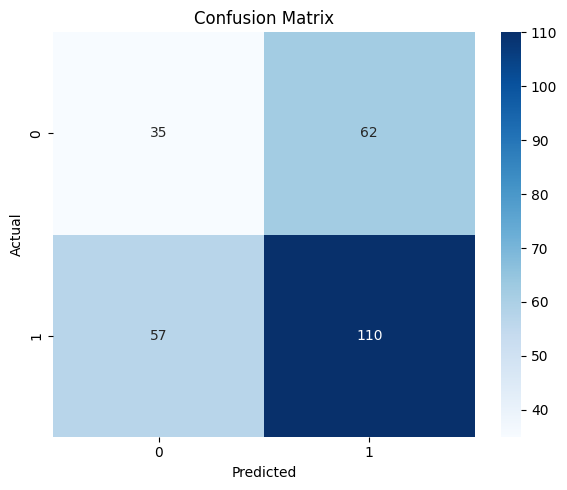

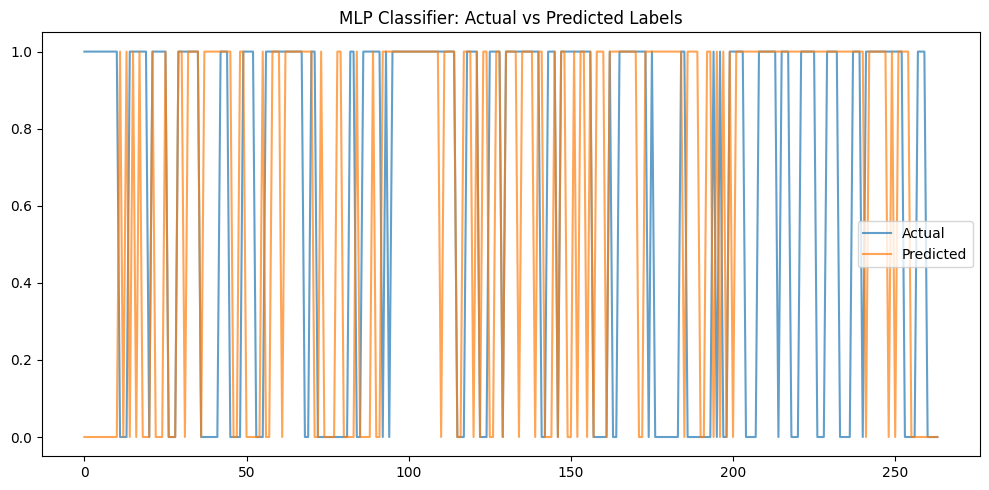

In [ ]:
X = df_final_merged.drop(columns=['label'])
y = df_final_merged['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=False
)

reg = MLPClassifier(
    hidden_layer_sizes=(200, 300),
    activation='relu',
    solver='adam',
    alpha=0.01,
    batch_size='auto',
    learning_rate='constant',
    max_iter=10000,
    random_state=42
)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Performance on Test Set:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual', alpha=0.7)
plt.plot(pd.Series(y_pred), label='Predicted', alpha=0.7)
plt.title("MLP Classifier: Actual vs Predicted Labels")
plt.legend()
plt.tight_layout()
plt.show()

Performance on Test Set:
Accuracy:  0.6288
Precision: 0.6716
Recall:    0.8084
F1 Score:  0.7337

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.32      0.39        97
           1       0.67      0.81      0.73       167

    accuracy                           0.63       264
   macro avg       0.58      0.56      0.56       264
weighted avg       0.61      0.63      0.61       264



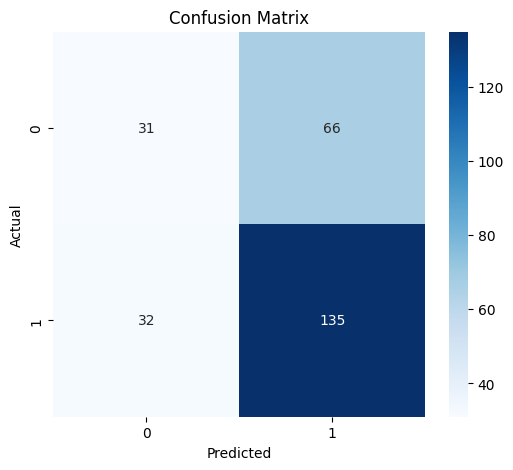

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced', 
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Performance on Test Set:")
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:   ", round(recall_score(y_test, y_pred), 4))
print("F1 Score: ", round(f1_score(y_test, y_pred), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

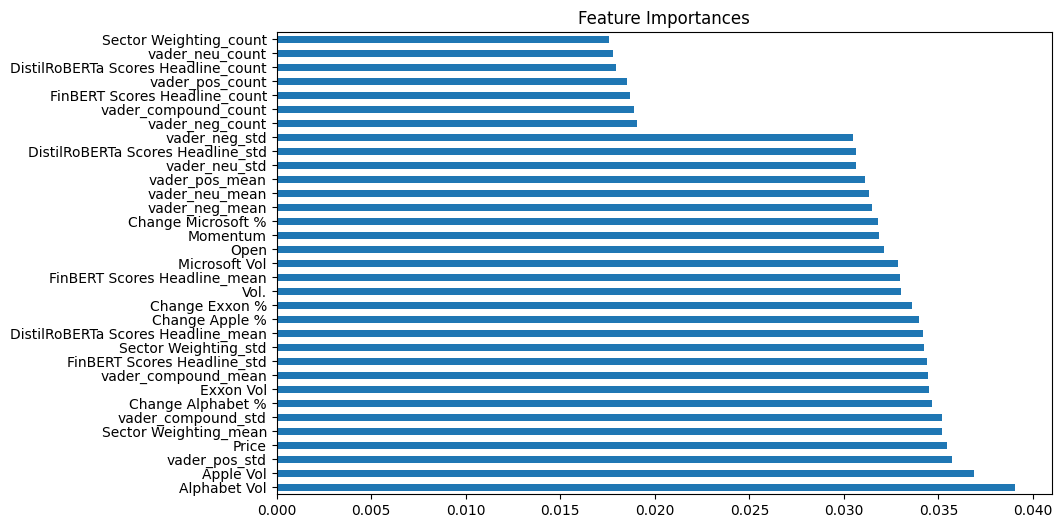

In [521]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title="Feature Importances")
plt.show()

### Without sentiment features

Performance on Test Set:
Accuracy:  0.4356
Precision: 0.5216
Recall:    0.4356
F1 Score:  0.4218

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.69      0.47        97
           1       0.62      0.29      0.39       167

    accuracy                           0.44       264
   macro avg       0.49      0.49      0.43       264
weighted avg       0.52      0.44      0.42       264



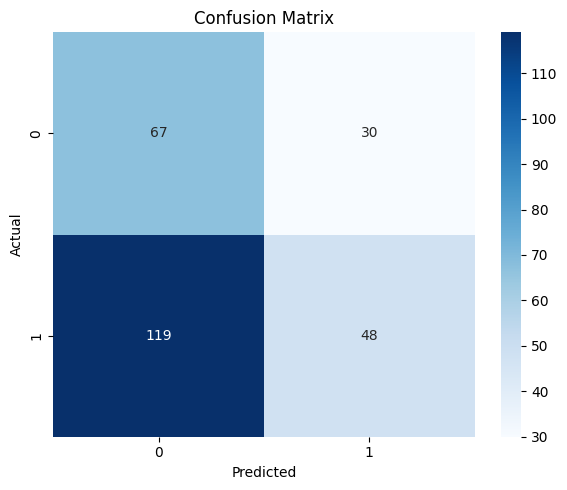

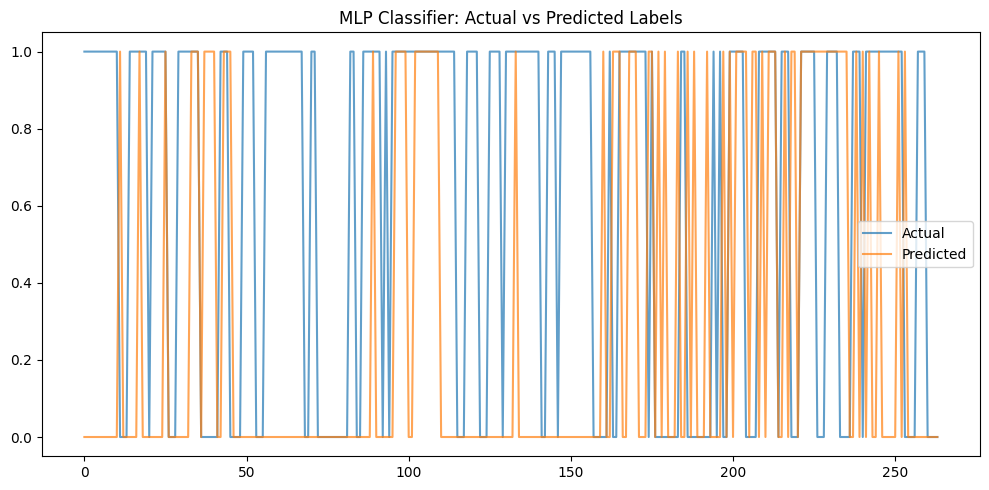

In [ ]:

X = df_final_merged.drop(columns=['label', 'DistilRoBERTa Scores Headline_mean',
       'DistilRoBERTa Scores Headline_std',
       'DistilRoBERTa Scores Headline_count', 'FinBERT Scores Headline_mean',
       'FinBERT Scores Headline_std', 'FinBERT Scores Headline_count',
       'vader_neg_mean', 'vader_neg_std', 'vader_neg_count', 'vader_neu_mean',
       'vader_neu_std', 'vader_neu_count', 'vader_pos_mean', 'vader_pos_std',
       'vader_pos_count', 'vader_compound_mean', 'vader_compound_std',
       'vader_compound_count'])
y = df_final_merged['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=False
)

reg = MLPClassifier(
    hidden_layer_sizes=(100, 150),
    activation='relu',
    solver='adam',
    alpha=0.01,
    batch_size='auto',
    learning_rate='constant',
    max_iter=10000,
    random_state=42
)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Performance on Test Set:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(y_test.reset_index(drop=True), label='Actual', alpha=0.7)
plt.plot(pd.Series(y_pred), label='Predicted', alpha=0.7)
plt.title("MLP Classifier: Actual vs Predicted Labels")
plt.legend()
plt.tight_layout()
plt.show()

Performance on Test Set:
Accuracy:  0.5114
Precision: 0.6418
Recall:    0.515
F1 Score:  0.5714

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.51      0.43        97
           1       0.64      0.51      0.57       167

    accuracy                           0.51       264
   macro avg       0.51      0.51      0.50       264
weighted avg       0.54      0.51      0.52       264



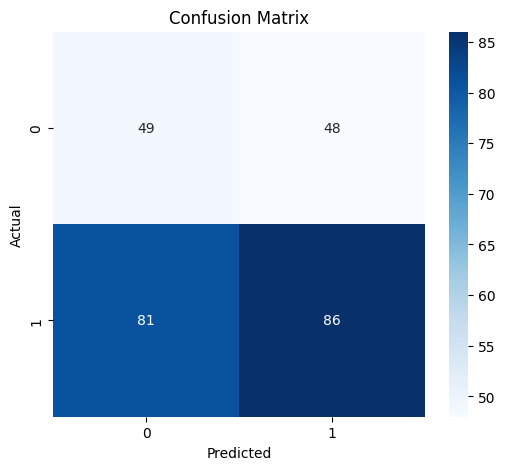

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    class_weight='balanced',  
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Performance on Test Set:")
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:   ", round(recall_score(y_test, y_pred), 4))
print("F1 Score: ", round(f1_score(y_test, y_pred), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

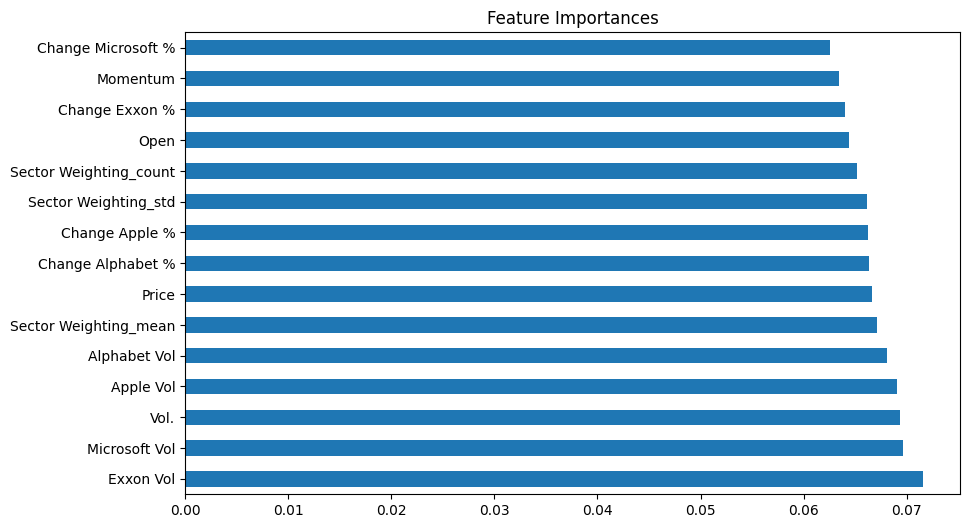

In [541]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title="Feature Importances")
plt.show()